In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv('wine1.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [13]:
df['Customer_Segment'].value_counts()

Customer_Segment
2    71
1    59
3    48
Name: count, dtype: int64

In [35]:
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()
df_scaled = sca.fit_transform(df)

In [37]:
from sklearn.decomposition import PCA

In [39]:
pca = PCA()

In [41]:
df_pca = pca.fit_transform(df_scaled)

In [45]:
var = pca.explained_variance_ratio_

In [47]:
var

array([0.51003634, 0.14853339, 0.06702619, 0.06257153, 0.05009893,
       0.03837954, 0.02882988, 0.01963591, 0.01828022, 0.01769633,
       0.01483498, 0.01075837, 0.00837412, 0.00494429])

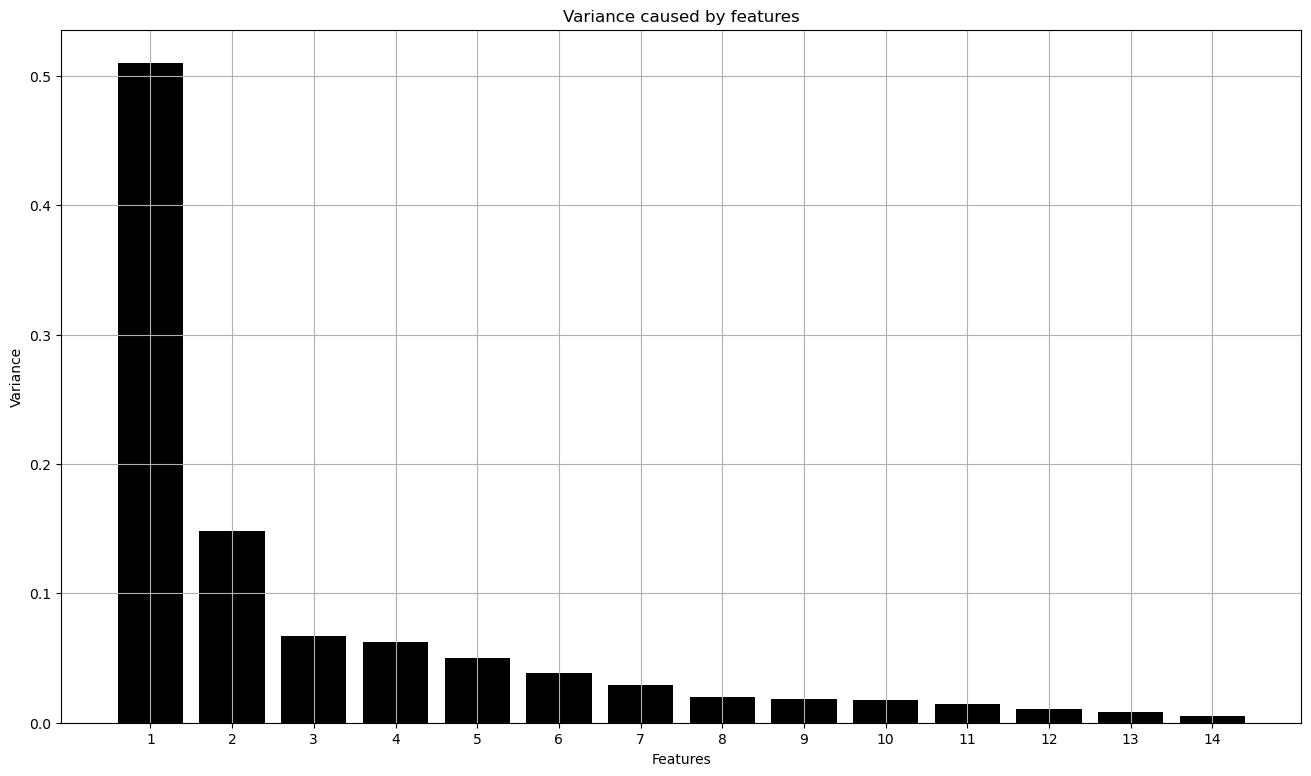

In [49]:
plt.figure(figsize=(16,9))
plt.title('Variance caused by features')
plt.xlabel('Features')
plt.ylabel('Variance')
plt.xticks(range(1,15,1))
plt.bar(range(1,15),var,color='black')
plt.grid();

In [57]:
x = df.iloc[ :,[1.2,3,4,5,6,7,8]]
x

,Malic_Acid,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins
0,1.71,15.6,127,2.80,3.06,0.28,2.29
1,1.78,11.2,100,2.65,2.76,0.26,1.28
2,2.36,18.6,101,2.80,3.24,0.30,2.81
3,1.95,16.8,113,3.85,3.49,0.24,2.18
4,2.59,21.0,118,2.80,2.69,0.39,1.82
...,...,...,...,...,...,...,...
173,5.65,20.5,95,1.68,0.61,0.52,1.06
174,3.91,23.0,102,1.80,0.75,0.43,1.41
175,4.28,20.0,120,1.59,0.69,0.43,1.35
176,2.59,20.0,120,1.65,0.68,0.53,1.46


In [59]:
from sklearn.cluster import AgglomerativeClustering

In [61]:
ag = AgglomerativeClustering(n_clusters = 4)

In [63]:
labels = ag.fit_predict(x)
labels

array([0, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 3, 3, 2, 1, 1, 1, 1, 1, 0, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 0, 1, 2, 1, 2, 2, 0, 1, 3, 2, 2,
       1, 1, 2, 2, 2, 1, 3, 2, 1, 1, 1, 1, 1, 2, 1, 3, 2, 2, 2, 3, 2, 2,
       3, 3, 1, 0, 2, 3, 3, 0, 2, 2, 3, 1, 0, 2, 3, 3, 3, 3, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 0, 0, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 2,
       1, 3, 2, 3, 3, 3, 3, 2, 3, 3, 2, 1, 2, 3, 3, 3, 3, 3, 3, 3, 1, 2,
       2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 3, 1, 2, 3, 3, 3, 1, 1, 1, 1, 2,
       2, 3, 3, 2, 2, 3, 3, 1, 2, 1, 3, 3, 1, 3, 2, 1, 2, 3, 3, 3, 2, 1,
       1, 2], dtype=int64)

KeyError: 'Annual Income (k$)'

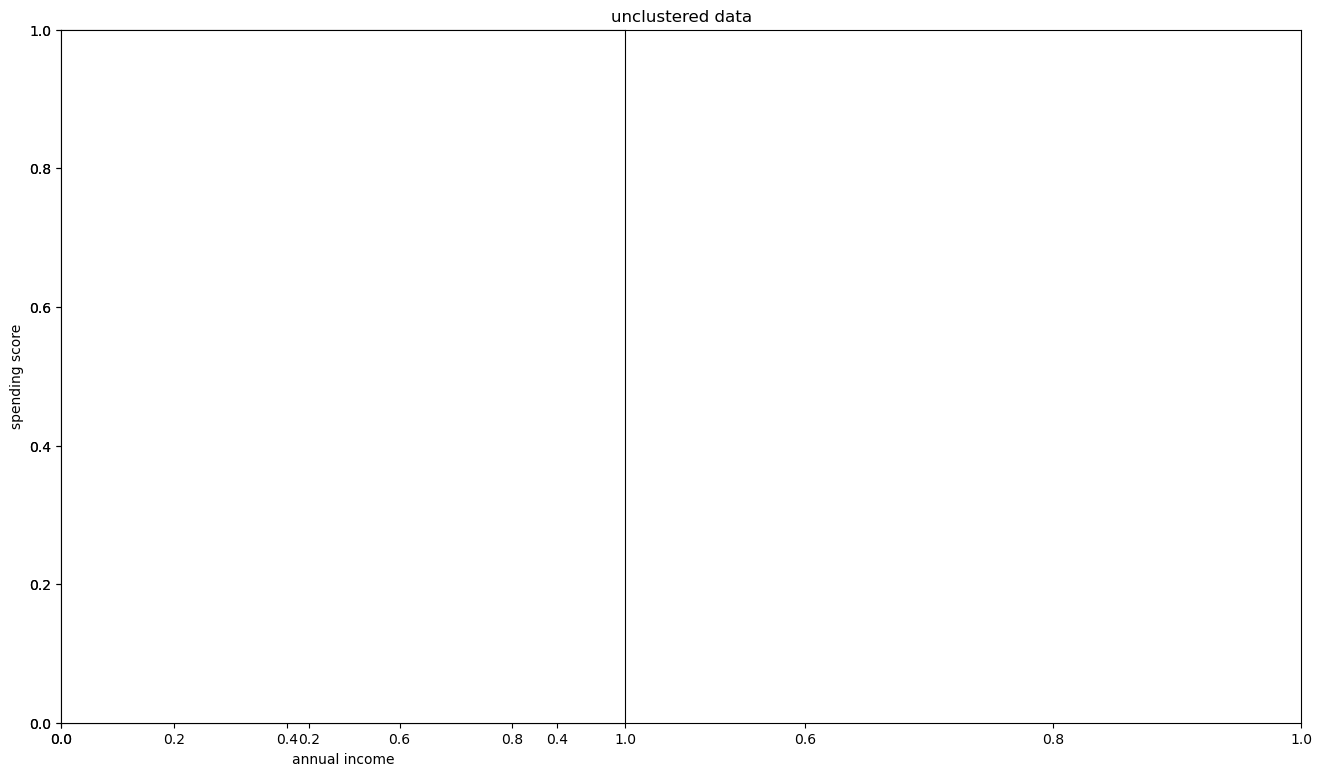

In [65]:
 0